In [1]:
file=r'C:\Users\umairansari\Desktop'

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
from math import floor

In [3]:
data=pd.read_csv(file+r"\profiles_ok_cupid.csv")

C:\Users\umairansari\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
data.shape

(60552, 31)

In [6]:
data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [7]:
data["status"].value_counts()

single            55695
seeing someone     2064
available          1864
married             310
unknown              10
Name: status, dtype: int64

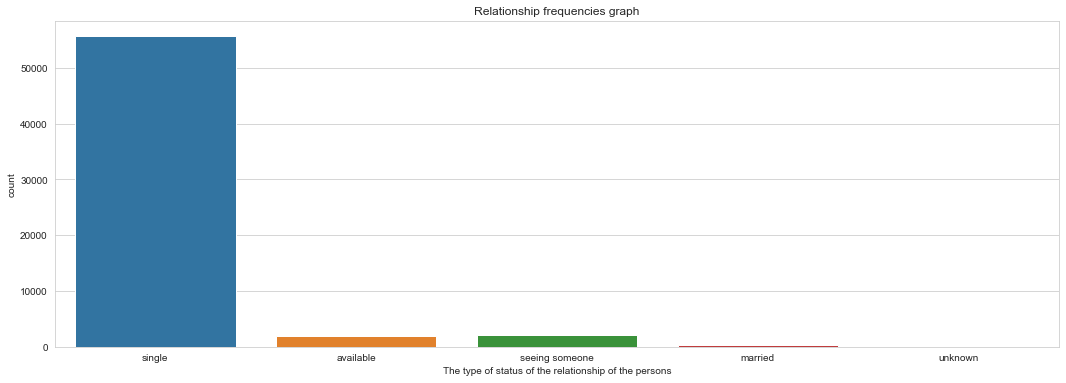

In [8]:
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
plt.title("Relationship frequencies graph")
sns.countplot(data["status"])
plt.xlabel("The type of status of the relationship of the persons")
plt.show()

In [9]:
data["status"].value_counts()
#counting the values of the status of the data 
#data["status"].fillna("test",inplace=True)
#filling the na data to prepare for the test data as we dont know the test data 
#datatest=data[data["status"]=="test"]
#retreiving the data and saperating it for test and train
#data=data.loc[data["status"]!="test"]
data.dropna(subset=["status"],axis=0,inplace=True)
#print("The new shape of the train data is"+str(datatest.shape))
print("The new shape of the test data is"+str(data.shape))
#total=datatest.shape[0]+data.shape[0]
#print("The total data we have now is "+str(total))

The new shape of the test data is(59943, 31)


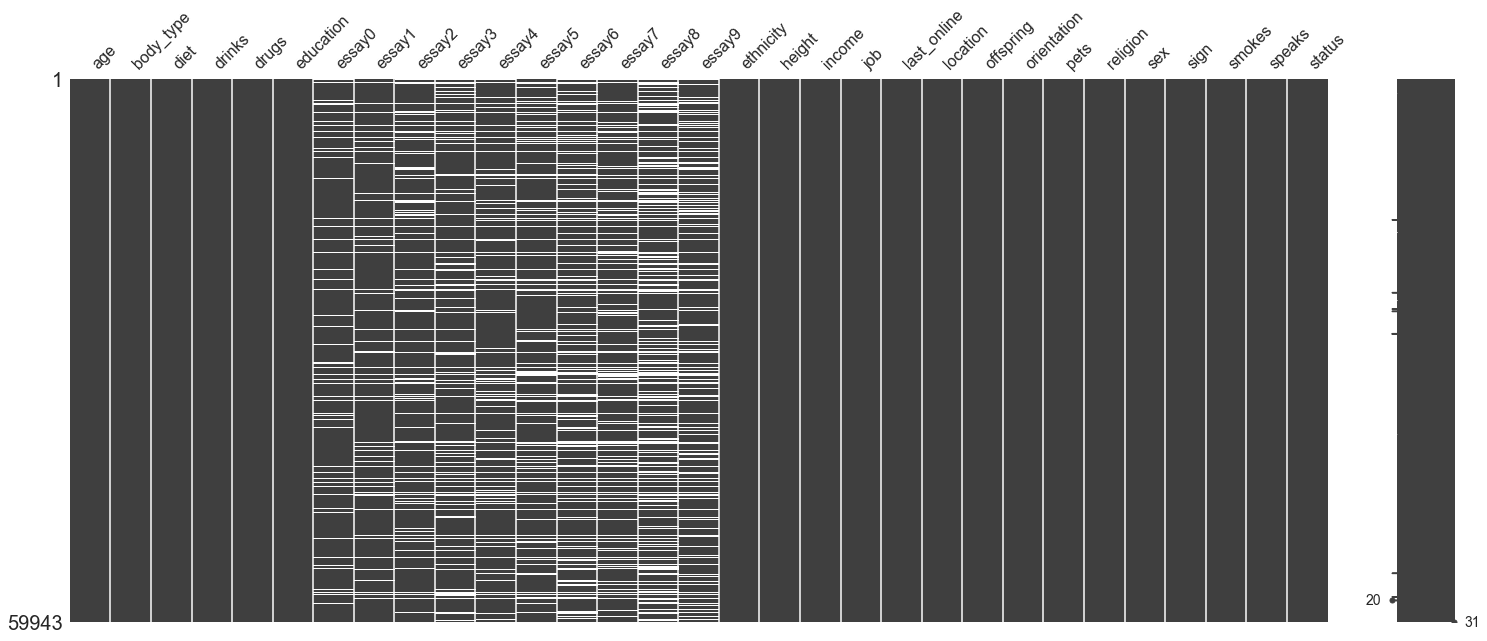

In [82]:
#miissing walues in the data set
msno.matrix(data)


In [13]:

#getting the data for the body type
data["body_type"].isna().sum()
#filling the values of the test and train data with other type
data["body_type"].fillna("other",inplace=True)

In [14]:
#flling the na data for diet column according to the domain knowledge
data["diet"].fillna("prefer not to say",inplace=True)

In [15]:
#filling the na data for drinks according to the domain knowledge column
data["drinks"].fillna("prefer not to say",inplace=True)

In [16]:
#changing the type of the height column to numeric 
data["height"]=pd.to_numeric(data["height"],errors='coerce')

In [20]:
print("The mean of the target column is "+str(np.mean(data["height"])))

The mean of the target column is 68.29522856189523


In [27]:
floor(np.mean(data["height"]))

68

In [28]:
#function to detect outliers for the data 
def detect_outliers(data):
    outliers = []
    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        print(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

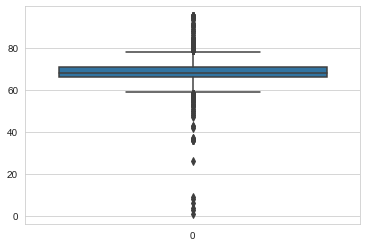

In [29]:
#checking the height whether it contains outliers or not
sns.boxplot(data=data["height"])
plt.xlabel("Height in cms")
plt.show()

In [42]:
#detecting the outliers after seeing the boxplot whiskers
heightoutliers=data.loc[data["height"]>80]
heightoutliers=data.loc[data["height"]<58]
print("People with more that normal height are"+str(heightoutliers.shape[0]))

People with more that normal height are70


In [36]:
%%time
#filling the NA values according to the domain knowledge of heights 
#data["height"].mean()
print("The median is "+str(data["height"].median()))
#we are filling the NA data of height column after checking the outliers 
data["height"].fillna(floor(np.mean(data["height"])),inplace=True)


The median is 68.0


In [41]:
%%time
#filling the NA values according to the domain knowledge
data["drugs"].fillna("prefer not to say",inplace=True)

In [47]:
%%time
#filling the NA values according to the domain knowledge
data["education"].isna().sum()
data["education"].fillna("prefer not to say",inplace=True)

In [51]:
%%time
#filling the NA values according to the domain knowledge
data["job"].isna().sum()
data["job"].fillna("prefer not to say",inplace=True)

In [59]:
data["offspring"].value_counts()

doesnot have kids                          7559
doesnot have kids, but might want them     3875
doesnot have kids, but wants them          3565
doesnot want kids                          2926
has kids                                   1883
has a kid                                  1881
doesnot have kids, and doesnot want any    1132
has kids, but doesnot want more             442
has a kid, but doesnot want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

In [60]:
%%time
#filling the NA values according to the domain knowledge
data["offspring"].isna().sum()
#data["offspring"]=data["offspring"].apply(lambda p:p.replace("&rsquo;","o"))
data["offspring"]=data["offspring"].str.replace("&rsquo;","o")
data["offspring"].fillna("prefer not to say",inplace=True)

In [65]:
data["pets"].fillna("dont like pets",inplace=True)

In [68]:
%%time
#filling the NA values according to the domain knowledge
data["religion"].isna().sum()

20226

In [69]:
%%time
#filling the NA values according to the domain knowledge
data["religion"].fillna("prefer not to say",inplace=True)

In [73]:
%%time
#filling the NA values according to the domain knowledge
data["smokes"].isna().sum()
data["smokes"].fillna("prefer not to say",inplace=True)

In [77]:
%%time
#filling the NA values according to the domain knowledge
#removing the irrational taggs from the data
data["sign"]=data["sign"].str.replace("&rsquo;","")
data["sign"].value_counts()
data["sign"].fillna("prefer not to say",inplace=True)

In [81]:
%%time
#filling the NA values according to the domain knowledge
data["ethnicity"].value_counts().sum()
data["ethnicity"].fillna("prefer not to say",inplace=True)

In [89]:
data["essay0"].head(20)

0     about me i would love to think that i was some...
1     i am a chef  this is what that means.1. i am a...
2     i'm not ashamed of much, but writing public te...
3             i work in a library and go to school. . .
4     hey how's it going? currently vague on the pro...
5     i'm an australian living in san francisco, but...
6     life is about the little things. i love to lau...
7                                                   NaN
8                                                   NaN
9     my names jake.i'm a creative guy and i look fo...
10    update  i'm seeing someone, so off the market ...
11    i was born in wisconsin, grew up in iowa, and ...
12                                    bang my shit bang
13                                                  NaN
14                                                  NaN
15                                                  NaN
16    i just moved to the bay area from austin, tx (...
17    to sum myself in whole  i have adventurous

In [98]:
#getting the column names of essay0:essay9
data.columns
colnames_essay=data.columns.values[6:16]
colnames_essay

array(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5',
       'essay6', 'essay7', 'essay8', 'essay9'], dtype=object)

In [108]:
%%time
#cleaning the data to remove some irrational tags
for col in colnames_essay:
    data[col]=data[col].str.replace("<br />","")
    data[col]=data[col].str.replace("/n","")
    data[col]=data[col].str.replace("\n","")
    data[col]=data[col].str.replace(":"," ")
    data[col]=data[col].str.replace('<em>','')    
    data[col]=data[col].str.replace('<strong>','')


Wall time: 10.8 s


In [101]:
%%time
#checking the column heads to get the overview of the data they contains 
for col in colnames_essay:
    print(data[col].head(5))

0    about me i would love to think that i was some...
1    i am a chef  this is what that means.1. i am a...
2    i'm not ashamed of much, but writing public te...
3            i work in a library and go to school. . .
4    hey how's it going? currently vague on the pro...
Name: essay0, dtype: object
0    currently working as an international agent fo...
1    dedicating everyday to being an unbelievable b...
2    i make nerdy software for musicians, artists, ...
3            reading things written by old dead people
4                           work work work work + play
Name: essay1, dtype: object
0    making people laugh.ranting about a good salti...
1    being silly. having ridiculous amonts of fun w...
2    improvising in different contexts. alternating...
3    playing synthesizers and organizing books acco...
4    creating imagery to look at http //bagsbrown.b...
Name: essay2, dtype: object
0    the way i look. i am a six foot half asian, ha...
1                                   

In [110]:
#renaming the columns to be more specific details
data.rename(columns={'essay0':'aboutme',
                          'essay1':'work_profession_details',
                          'essay2':'your_speciality','essay3':'describe_your_look','essay4':'your_interests',
                    'essay4':'things_you_do','essay5':'things_you_love_todo','essay6':'things_you_love_todo1',
                    'essay7':'things_you_prefer_todo','essay8':'what_brings_you_here','essay9':'pickup_lines'}, 
                 inplace=True)
 

In [111]:
#checking the new column names
data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'aboutme',
       'work_profession_details', 'your_speciality', 'describe_your_look',
       'things_you_do', 'things_you_love_todo', 'things_you_love_todo1',
       'things_you_prefer_todo', 'what_brings_you_here', 'pickup_lines',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

In [118]:
colnames_essay_modified

['aboutme',
 'work_profession_details',
 'your_speciality',
 'describe_your_look',
 'things_you_do',
 'things_you_love_todo',
 'things_you_love_todo1',
 'things_you_prefer_todo',
 'what_brings_you_here',
 'pickup_lines']

In [127]:
colnames_essay_modified=list(data.columns.values[6:16])
#for col in colnames_essay_modified:
cleaned_data=data.drop(data.columns[6:16], axis = 1) 
#cleaned_data=data.dropna(subset=colnames_essay_modified,axis=1)

In [128]:
cleaned_data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')